In [1]:
[General Setup]

    save_path = ./
    input_features = time, N_sine_feature,N_linear_feature
    target_feature = y_feature
    target_error_feature = N_linear_feature #need to change
    labeling_features = str_cat, num_id
    grouping_feature = str_cat

[CSV Setup]
    setup_class = test.random_data.MakeRandomData
    save_path = ../random_data
    random_seed = 0

[Data Setup]

    [[Initial]]
    data_path = ../random_data/random_test_data.csv
    weights = False #haven't tested weighting; may move

    [[Extrapolation]]
    data_path = ../random_data/random_test_data_noy.csv
    weights = False
    
    [[ExtrapolationNoD]]
    data_path = ../random_data/random_test_data_noy_noD.csv
    weights = False

    [[InitialNoD]]
    data_path = ../random_data/random_test_data_noD.csv
    weights = False
    
    [[InitialNoA]]
    data_path = ../random_data/random_test_data_noA.csv
    weights = False

    [[Set2]]
    data_path = ../random_data/random_set2_data.csv
    weights = False


[Models and Tests to Run]

    models = gkrr_model
    #Okay tests:
    #test_cases = SingleFit_withfilter,SingleFit_withy,SingleFit_noy
    #test_cases = SingleFitGrouped_test,SingleFitGrouped_match,SingleFitGrouped_nomatch,SingleFitGrouped_withfilter
    #test_cases = SingleFitPerGroup_test
    #test_cases = PredictionVsFeature_test
    #test_cases = KFoldCV_5fold, LeaveOutPercentCV_50, LeaveOneOutCV, LeaveOutGroupCV_cat
    #Okay tests, all:
    #test_cases = SingleFit_withfilter,SingleFit_withy,SingleFit_noy,SingleFitGrouped_test,SingleFitGrouped_match,SingleFitGrouped_nomatch,SingleFitGrouped_withfilter,SingleFitPerGroup_test,PredictionVsFeature_test, KFoldCV_5fold, LeaveOutPercentCV_50, LeaveOneOutCV, LeaveOutGroupCV_cat, ParamOptGA, SingleFit_fromparams, PlotNoAnalysis
    
    #Under development:
    #test_cases = ParamOptGA, SingleFit_fromparams
    test_cases = KFoldCV_5fold
    
[Test Parameters]

    [[SingleFit_withy]]
    training_dataset = Initial
    testing_dataset  = Initial
    xlabel = Measured target
    ylabel = Target prediction
    stepsize = 1.0
    
    [[SingleFit_withfilter]]
    training_dataset = Initial
    testing_dataset  = Initial
    xlabel = Measured target
    ylabel = Target prediction
    stepsize = 1.0
    plot_filter_out = time;>;7.8,time;<;1.3,str_cat;=;A

    [[SingleFit_noy]]
    training_dataset = Initial
    testing_dataset = Extrapolation

    [[SingleFitGrouped_test]]
    training_dataset=Initial
    testing_dataset=Initial
    xlabel=Initial dataset measured
    ylabel=Initial dataset predicted
    stepsize=0.5
    mark_outlying_groups = 2
    fit_only_on_matched_groups = 0
    
    [[SingleFitGrouped_withfilter]]
    training_dataset=Initial
    testing_dataset=Initial
    xlabel=Initial dataset measured
    ylabel=Initial dataset predicted
    stepsize=0.5
    mark_outlying_groups = 2
    fit_only_on_matched_groups = 0
    plot_filter_out = str_cat;=;C,time;>;8.0
    
    [[SingleFitGrouped_nomatch]]
    training_dataset=Initial
    testing_dataset=InitialNoD
    xlabel=Initial dataset measured
    ylabel=Initial dataset predicted
    stepsize=0.5
    mark_outlying_groups = 2
    fit_only_on_matched_groups = 0
    
    [[SingleFitGrouped_match]]
    training_dataset=Initial
    testing_dataset=InitialNoD
    xlabel=Initial dataset measured
    ylabel=Initial dataset predicted
    stepsize=0.5
    mark_outlying_groups = 2
    fit_only_on_matched_groups = 1
    
    [[SingleFitPerGroup_test]]
    training_dataset=InitialNoA
    testing_dataset=InitialNoD
    xlabel=Initial dataset measured
    ylabel=Initial dataset predicted
    stepsize=0.5
    mark_outlying_groups = 2
    plot_filter_out = time;>;7.5

    [[PredictionVsFeature_test]]
    training_dataset=Initial
    testing_dataset=Initial, Set2,Extrapolation
    input_features=time, N_sine_feature, N_linear_feature
    labeling_features=str_cat, num_id
    xlabel=Initial dataset measured
    ylabel=Predicted
    stepsize=0.5
    grouping_feature = str_cat
    mark_outlying_groups = 2
    feature_plot_xlabel = Time
    feature_plot_ylabel = Y feature
    feature_plot_feature = time
    plot_filter_out = time;>;4.2
    fit_only_on_matched_groups = 0
    markers = x,s,^,+,o,d
    outlines = blue, red, black, magenta, green, cyan
    linestyles = -, None, :, None, --, -
    data_labels = Initial repredict, Set2, Extrapolation test
    sizes = 10,4,12,6,8,2
    legendloc = lower right

    [[KFoldCV_5fold]]
    training_dataset = Initial
    testing_dataset  = Initial
    xlabel = Measured target
    ylabel = Target prediction
    stepsize = 1.0
    num_folds = 5
    num_cvtests = 20
    fix_random_for_testing = 1
    mark_outlying_points = 1,3

    [[LeaveOutPercentCV_50]]
    training_dataset = Initial
    testing_dataset  = Initial
    xlabel = Measured target
    ylabel = Target prediction
    stepsize = 1.0
    mark_outlying_points = 1,3
    percent_leave_out = 50
    num_cvtests = 20
    fix_random_for_testing = 1
    
    [[LeaveOutGroupCV_cat]]
    training_dataset = Initial
    testing_dataset  = Initial
    xlabel = Group
    ylabel = RMSE (arb. units)
    mark_outlying_points = 3
    
    [[LeaveOneOutCV]]
    training_dataset = Initial
    testing_dataset  = Initial
    xlabel = Measured
    ylabel = Predicted
    stepsize = 1.0
    mark_outlying_points = 3

    [[ParamOptGA]]
    training_dataset = Initial
    testing_dataset = Initial, Set2
    num_folds = 2  #todo: also allow percent_leave_out = 50 for example
    num_cvtests = 20
    num_gas = 2
    population_size = 5
    convergence_generations = 2
    max_generations = 5
    fix_random_for_testing = 1
    num_parents = 3
    use_multiprocessing = 2
    additional_feature_methods = Testing.subtraction;2;col1:N_sine_feature;col2:N_linear_feature
    #additional_feature_methods = DBTT.calculate_EffectiveFluence;1;flux_feature:N_sine_feature;fluence_feature:N_linear_feature
    
    [[SingleFit_fromparams]]
    training_dataset = Initial
    testing_dataset  = Initial
    xlabel = Measured target
    ylabel = Target prediction
    stepsize = 1.0

    [[PlotNoAnalysis]]
    training_dataset = Initial
    testing_dataset = Initial,Set2
    xlabel = Time
    ylabel = Target
    timex = %H:%M:%S
    feature_plot_feature = time
    plot_filter_out=str_cat;=;C,time;>;8
    data_labels = Initial data, Set2 data

[Model Parameters]

    [[linear_model]]
    fit_intercept = True

    [[decision_tree_model]]
    max_depth = 5
    min_samples_split = 2
    min_samples_leaf = 1
    split_criterion = mse

    [[gkrr_model]]
    alpha = 0.00139
    coef0 = 1
    degree = 3
    gamma = 0.518
    kernel = rbf

    [[lkrr_model]]
    alpha = 0.00518
    gamma = 0.518
    kernel = laplacian

    [[randomforest_model]]
    split_criterion = mse
    estimators = 100
    max_depth = 5
    min_samples_split = 2
    min_samples_leaf = 1
    max_leaf_nodes = 2
    jobs = 1

    [[adaboost_model]]
    estimators = 275
    max_depth = 12
    min_samples_split = 2
    min_samples_leaf = 1
    learning rate = 1
    loss function = linear

    #minmax, size, transfer_function are the verbatim arguments for neurolab.net.newff()
    #training_algorithm is the verbatim 'support train fcn' for neurolab.train omitting 'train_'
    #see: https://pythonhosted.org/neurolab/lib.html#module-neurolab.net
    #epochs,show,goal are neurolab.net.train() arguments
    #see: https://pythonhosted.org/neurolab/lib.html#train-algorithms-based-gradients-algorithms
    #NOTE: minmax is verbose b/c [[0,1]]*9 will have bad pointers
    [[nn_model_neurolab]]
    #minmax = [[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1]]
    minmax = [0, 1], [0, 1], [0, 1]
    size = 11, 1
    transfer_function = TanSig
    training_algorithm = bfgs
    epochs = 5
    show = False
    goal = 0.01[default]

SyntaxError: invalid syntax (<ipython-input-1-d2c4f5cd8bbd>, line 1)

['time', 'N_sine_feature', 'N_linear_feature']
y_feature
[16]
[95, 16, 72]
Populating the interactive namespace from numpy and matplotlib
/Users/ttm3/TTMUW_2015/DBTT/analysis_reproduction_testing/MAST-ml-private/test/jupyter/KFoldCV_5fold_KernelRidge0


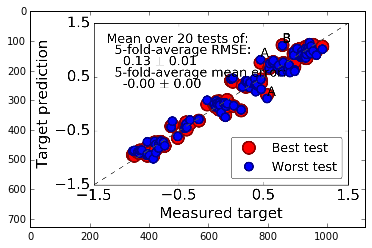

In [3]:
mylines = In[1].split("\n")
with open("./test.conf","w") as cfile:
    for myline in mylines:
        cfile.write("%s\n" % myline)
from MASTML import MASTMLDriver
mastml = MASTMLDriver(configfile="test.conf")
mastml.run_MASTML()
%pylab inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for test_save_path in mastml.test_save_paths:
    test_short = test_save_path.split("/")[-1].split("_")[0]
    if test_short in mastml.favorites_dict.keys():
        print(test_save_path)
        for fitem in mastml.favorites_dict[test_short]:
            fpath = os.path.join(test_save_path, fitem)
            if ".png" in fpath:
                image = mpimg.imread(fpath)
                imgplot = plt.imshow(image)
                plt.show()
            else:
                with open(fpath,'r') as ffile:
                    print(ffile.read())